## Neural Network from Scratch - Breast Cancer Classification
#### Built with only Python and NumPy (no ML libraries)

### Authors:
* Ian Gabriel Paulmino
* Ibrahim
* Corpuz

#### Date: October 2025


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap



print("=" * 60)
print("NEURAL NETWORK FROM SCRATCH")
print("Breast Cancer Classification")
print("=" * 60)

NEURAL NETWORK FROM SCRATCH
Breast Cancer Classification


### PART 1: DATA LOADING AND PREPARATION

In [2]:
print("\n[1] Loading Dataset...")

# Load the breast cancer dataset
# You can load from the CSV file provided or use sklearn to download
try:
    # Option 1: Load from CSV file (if you have the file)
    df = pd.read_csv('data/wdbc.csv')
    print(f"Dataset loaded from CSV: {df.shape}")
except Exception as e:
   print(f"An error in loading dataset {e}")

# Display basic information
print(f"\nDataset shape: {df.shape}")
print(f"Features: {df.shape[1] - 1}")
print(f"\nFirst few rows:")
print(df.head())

# Check class distribution
if 'Diagnosis' in df.columns:
    target_col = 'Diagnosis'
else:
    target_col = df.columns[-1]

print(f"\nClass Distribution:")
print(df[target_col].value_counts())


[1] Loading Dataset...
Dataset loaded from CSV: (569, 32)

Dataset shape: (569, 32)
Features: 31

First few rows:
         ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0    842302         M    17.99     10.38      122.80  1001.0      0.11840   
1    842517         M    20.57     17.77      132.90  1326.0      0.08474   
2  84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3  84348301         M    11.42     20.38       77.58   386.1      0.14250   
4  84358402         M    20.29     14.34      135.10  1297.0      0.10030   

   compactness1  concavity1  concave_points1  ...  radius3  texture3  \
0       0.27760      0.3001          0.14710  ...    25.38     17.33   
1       0.07864      0.0869          0.07017  ...    24.99     23.41   
2       0.15990      0.1974          0.12790  ...    23.57     25.53   
3       0.28390      0.2414          0.10520  ...    14.91     26.50   
4       0.13280      0.1980          0.10430  ...    22.54    

### PART 2: EXPLORATORY DATA ANALYSIS (EDA)


[2] Exploratory Data Analysis - Feature Selection

Top 10 Features by Correlation with Target:
 1. concave_points3               : 0.7936
 2. perimeter3                    : 0.7829
 3. concave_points1               : 0.7766
 4. radius3                       : 0.7765
 5. perimeter1                    : 0.7426
 6. area3                         : 0.7338
 7. radius1                       : 0.7300
 8. area1                         : 0.7090
 9. concavity1                    : 0.6964
10. concavity3                    : 0.6596

✓ Selected Features:
  Feature 1: concave_points3 (correlation: 0.7936)
  Feature 2: perimeter3 (correlation: 0.7829)


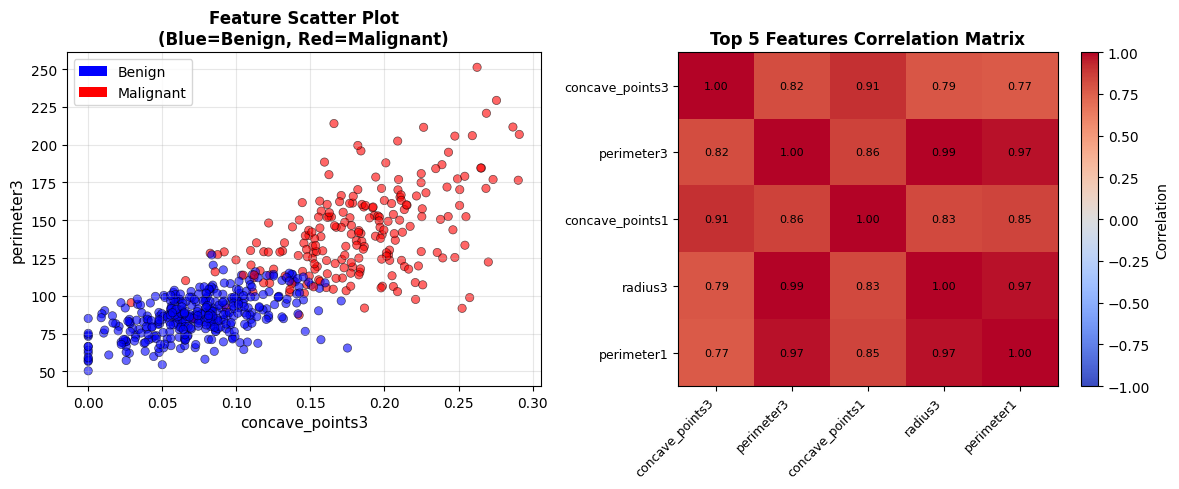


✓ EDA plots saved as 'eda_analysis.png'


In [3]:
print("\n" + "=" * 60)
print("[2] Exploratory Data Analysis - Feature Selection")
print("=" * 60)

# Prepare features and target
X = df.drop(columns=[target_col, 'ID'] if 'ID' in df.columns else [target_col])
if df[target_col].dtype == 'object':
    # Convert M/B to 1/0
    y = (df[target_col] == 'M').astype(int).values
else:
    y = df[target_col].values

# Calculate correlation of each feature with target
correlations = {}
for col in X.columns:
    correlations[col] = np.abs(np.corrcoef(X[col], y)[0, 1])

# Sort features by correlation
sorted_features = sorted(correlations.items(), key=lambda x: x[1], reverse=True)

print("\nTop 10 Features by Correlation with Target:")
for i, (feature, corr) in enumerate(sorted_features[:10], 1):
    print(f"{i:2d}. {feature:30s}: {corr:.4f}")

# Select top 2 features for our 2-input neural network
feature1, corr1 = sorted_features[0]
feature2, corr2 = sorted_features[1]

print(f"\n✓ Selected Features:")
print(f"  Feature 1: {feature1} (correlation: {corr1:.4f})")
print(f"  Feature 2: {feature2} (correlation: {corr2:.4f})")

# Create scatter plot to visualize the relationship
plt.figure(figsize=(12, 5))

# Plot 1: Scatter plot of selected features
plt.subplot(1, 2, 1)
colors = ['blue' if label == 0 else 'red' for label in y]
labels_text = ['Benign' if label == 0 else 'Malignant' for label in y]
plt.scatter(X[feature1], X[feature2], c=colors, alpha=0.6, edgecolors='k', linewidth=0.5)
plt.xlabel(feature1, fontsize=11)
plt.ylabel(feature2, fontsize=11)
plt.title('Feature Scatter Plot\n(Blue=Benign, Red=Malignant)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='blue', label='Benign'),
                   Patch(facecolor='red', label='Malignant')]
plt.legend(handles=legend_elements, loc='best')

# Plot 2: Correlation heatmap for top features
plt.subplot(1, 2, 2)
top_features = [f[0] for f in sorted_features[:5]]
corr_matrix = X[top_features].corr()
im = plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(im, label='Correlation')
plt.xticks(range(len(top_features)), top_features, rotation=45, ha='right', fontsize=9)
plt.yticks(range(len(top_features)), top_features, fontsize=9)
plt.title('Top 5 Features Correlation Matrix', fontsize=12, fontweight='bold')

for i in range(len(top_features)):
    for j in range(len(top_features)):
        text = plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.savefig('eda_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ EDA plots saved as 'eda_analysis.png'")

### PART 3: DATA PREPROCESSING

In [4]:
print("\n" + "=" * 60)
print("[3] Data Preprocessing")
print("=" * 60)

# Extract selected features
X_selected = X[[feature1, feature2]].values

# Normalize features
X_mean = X_selected.mean(axis=0)
X_std = X_selected.std(axis=0)
X_normalized = (X_selected - X_mean) / X_std

# Split into train and test sets (80-20 split)
split_ratio = 0.8
split_index = int(len(X_normalized) * split_ratio)

# Shuffle the data
indices = np.random.permutation(len(X_normalized))
X_shuffled = X_normalized[indices]
y_shuffled = y[indices].reshape(-1, 1)

X_train = X_shuffled[:split_index]
y_train = y_shuffled[:split_index]
X_test = X_shuffled[split_index:]
y_test = y_shuffled[split_index:]

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Feature normalization applied (mean=0, std=1)")


[3] Data Preprocessing
Training set: 455 samples
Test set: 114 samples
Feature normalization applied (mean=0, std=1)


### PART 4: NEURAL NETWORK IMPLEMENTATION

In [ ]:
print("\n" + "=" * 60)
print("[4] Neural Network Architecture")
print("=" * 60)

class NeuralNetwork:
    """
    A simple neural network with one hidden layer
    Built from scratch using only NumPy
    """
    
    def __init__(self, input_size=2, hidden_size=3, output_size=1, activation='sigmoid'):
        """
        Initialize network architecture
        
        Parameters:
        - input_size: number of input features (2)
        - hidden_size: number of neurons in hidden layer (2-4)
        - output_size: number of output neurons (1 for binary classification)
        - activation: activation function ('sigmoid', 'relu', or 'tanh')
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.activation_name = activation
        
        # Initialize weights and biases with small random values
        # He initialization for better gradient flow
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / input_size)
        self.b1 = np.zeros((1, hidden_size))
        
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2.0 / hidden_size)
        self.b2 = np.zeros((1, output_size))
        
        # Storage for gradients and activations
        self.cache = {}
        
        print(f"Network initialized:")
        print(f"  Input layer: {input_size} neurons")
        print(f"  Hidden layer: {hidden_size} neurons (activation: {activation})")
        print(f"  Output layer: {output_size} neuron (activation: sigmoid)")
    
    def sigmoid(self, z):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))
    
    def sigmoid_derivative(self, a):
        """Derivative of sigmoid function"""
        return a * (1 - a)
    
    def relu(self, z):
        """ReLU activation function"""
        return np.maximum(0, z)
    
    def relu_derivative(self, z):
        """Derivative of ReLU function"""
        return (z > 0).astype(float)
    
    def tanh(self, z):
        """Tanh activation function"""
        return np.tanh(z)
    
    def tanh_derivative(self, a):
        """Derivative of tanh function"""
        return 1 - a ** 2
    
    def activate(self, z, derivative=False):
        """Apply activation function based on network configuration"""
        if self.activation_name == 'sigmoid':
            if derivative:
                a = self.sigmoid(z)
                return self.sigmoid_derivative(a)
            return self.sigmoid(z)
        elif self.activation_name == 'relu':
            if derivative:
                return self.relu_derivative(z)
            return self.relu(z)
        elif self.activation_name == 'tanh':
            if derivative:
                a = self.tanh(z)
                return self.tanh_derivative(a)
            return self.tanh(z)
    
    def forward_propagation(self, X):
        """
        Forward pass through the network
        
        Parameters:
        - X: input data (m samples × n features)
        
        Returns:
        - A2: output predictions
        """
        # Hidden layer computation
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = self.activate(Z1)
        
        # Output layer computation
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = self.sigmoid(Z2)  # Always sigmoid for binary classification output
        
        # Cache values for backpropagation
        self.cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2, 'X': X}
        
        return A2
    
    def compute_loss(self, y_true, y_pred):
        """
        Compute Mean Squared Error (MSE) loss
        
        Parameters:
        - y_true: true labels
        - y_pred: predicted labels
        
        Returns:
        - loss: MSE loss value
        """
        m = y_true.shape[0]
        loss = np.sum((y_pred - y_true) ** 2) / (2 * m)
        return loss
    
    def backward_propagation(self, y_true):
        """
        Backward pass - compute gradients
        
        Parameters:
        - y_true: true labels
        """
        m = y_true.shape[0]
        
        # Retrieve cached values
        X = self.cache['X']
        A1 = self.cache['A1']
        A2 = self.cache['A2']
        Z1 = self.cache['Z1']
        
        # Output layer gradients (MSE loss derivative)
        dZ2 = (A2 - y_true) * self.sigmoid_derivative(A2)
        dW2 = np.dot(A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        # Hidden layer gradients
        dA1 = np.dot(dZ2, self.W2.T)
        if self.activation_name == 'relu':
            dZ1 = dA1 * self.relu_derivative(Z1)
        elif self.activation_name == 'tanh':
            dZ1 = dA1 * self.tanh_derivative(A1)
        else:  # sigmoid
            dZ1 = dA1 * self.sigmoid_derivative(A1)
        
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        
        # Store gradients
        self.gradients = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}
    
    def update_parameters(self, learning_rate):
        """
        Update weights and biases using gradient descent
        
        Parameters:
        - learning_rate: learning rate for gradient descent
        """
        self.W1 -= learning_rate * self.gradients['dW1']
        self.b1 -= learning_rate * self.gradients['db1']
        self.W2 -= learning_rate * self.gradients['dW2']
        self.b2 -= learning_rate * self.gradients['db2']
    
    def train(self, X, y, learning_rate=0.1, iterations=1000, verbose=True):
        """
        Train the neural network
        
        Parameters:
        - X: training data
        - y: training labels
        - learning_rate: learning rate for gradient descent
        - iterations: number of training iterations
        - verbose: whether to print progress
        
        Returns:
        - losses: list of loss values during training
        """
        losses = []
        
        for i in range(iterations):
            # Forward propagation
            y_pred = self.forward_propagation(X)
            
            # Compute loss
            loss = self.compute_loss(y, y_pred)
            losses.append(loss)
            
            # Backward propagation
            self.backward_propagation(y)
            
            # Update parameters
            self.update_parameters(learning_rate)
            
            # Print progress
            if verbose and (i % 100 == 0 or i == iterations - 1):
                accuracy = np.mean((y_pred > 0.5) == y) * 100
                print(f"Iteration {i:4d}: Loss = {loss:.6f}, Accuracy = {accuracy:.2f}%")
        
        return losses
    
    def predict(self, X, threshold=0.5):
        """
        Make predictions on new data
        
        Parameters:
        - X: input data
        - threshold: classification threshold (default: 0.5)
        
        Returns:
        - predictions: binary predictions (0 or 1)
        """
        y_pred = self.forward_propagation(X)
        return (y_pred > threshold).astype(int)
    
    def evaluate(self, X, y):
        """
        Evaluate model performance
        
        Parameters:
        - X: input data
        - y: true labels
        
        Returns:
        - accuracy: classification accuracy
        """
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y) * .07100
        return accuracy


[4] Neural Network Architecture


### PART 5: MODEL TRAINING

In [6]:
print("\n" + "=" * 60)
print("[5] Training Neural Network")
print("=" * 60)

# Create and train the model
# You can experiment with different configurations:
# - hidden_size: 2, 3, or 4
# - activation: 'sigmoid', 'relu', or 'tanh'
# - learning_rate: 0.01, 0.1, 0.5
# - iterations: 500, 1000, 1500

model = NeuralNetwork(
    input_size=2,
    hidden_size=4,
    output_size=1,
    activation='relu'
)

print("\nStarting training...\n")

losses = model.train(
    X_train,
    y_train,
    learning_rate=0.5,
    iterations=1000,
    verbose=True
)

print("\n✓ Training completed!")


[5] Training Neural Network
Network initialized:
  Input layer: 2 neurons
  Hidden layer: 4 neurons (activation: relu)
  Output layer: 1 neuron (activation: sigmoid)

Starting training...

Iteration    0: Loss = 0.106317, Accuracy = 64.18%
Iteration  100: Loss = 0.023748, Accuracy = 93.63%
Iteration  200: Loss = 0.021466, Accuracy = 93.85%
Iteration  300: Loss = 0.020866, Accuracy = 93.63%
Iteration  400: Loss = 0.020590, Accuracy = 93.63%
Iteration  500: Loss = 0.020432, Accuracy = 93.85%
Iteration  600: Loss = 0.020323, Accuracy = 93.85%
Iteration  700: Loss = 0.020235, Accuracy = 93.85%
Iteration  800: Loss = 0.020169, Accuracy = 93.85%
Iteration  900: Loss = 0.020095, Accuracy = 93.85%
Iteration  999: Loss = 0.020015, Accuracy = 94.07%

✓ Training completed!


### PART 6: MODEL EVALUATION

In [7]:
print("\n" + "=" * 60)
print("[6] Model Evaluation")
print("=" * 60)

# Evaluate on training set
train_accuracy = model.evaluate(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}%")

# Evaluate on test set
test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Detailed test set predictions
y_pred_test = model.predict(X_test)
print(f"\nTest Set Confusion Matrix:")

# Calculate confusion matrix components
true_positives = np.sum((y_test == 1) & (y_pred_test == 1))
true_negatives = np.sum((y_test == 0) & (y_pred_test == 0))
false_positives = np.sum((y_test == 0) & (y_pred_test == 1))
false_negatives = np.sum((y_test == 1) & (y_pred_test == 0))

print(f"  True Positives:  {true_positives}")
print(f"  True Negatives:  {true_negatives}")
print(f"  False Positives: {false_positives}")
print(f"  False Negatives: {false_negatives}")


[6] Model Evaluation
Training Accuracy: 94.07%
Test Accuracy: 96.49%

Test Set Confusion Matrix:
  True Positives:  47
  True Negatives:  63
  False Positives: 2
  False Negatives: 2


### PART 7: VISUALIZATION


[7] Generating Visualizations


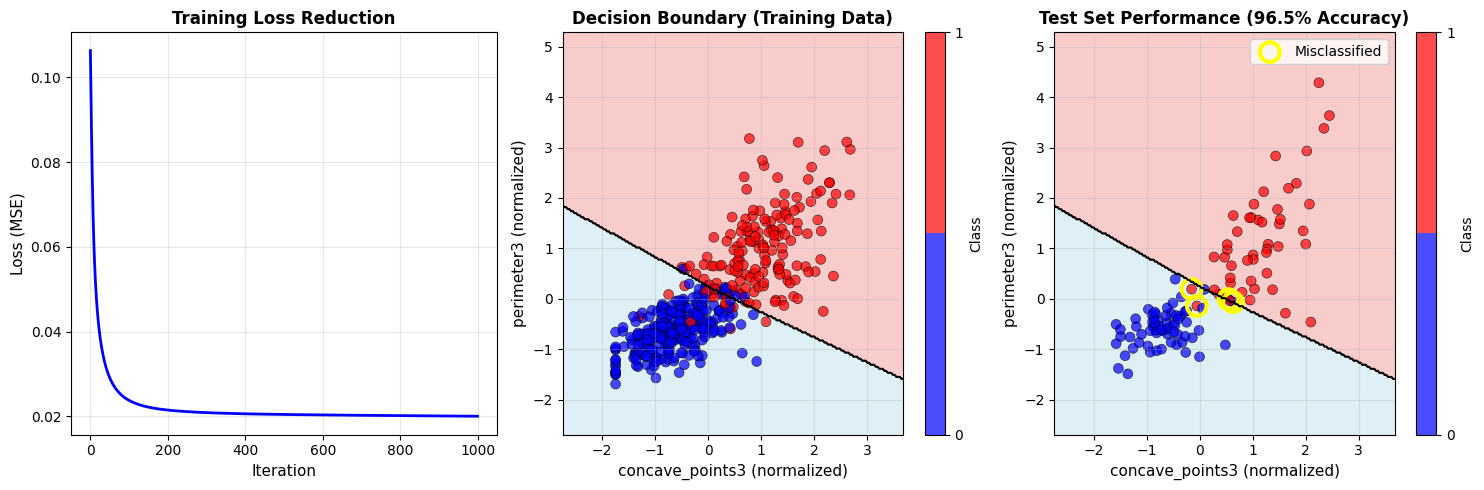


✓ Visualizations saved as 'training_results.png'


In [8]:
print("\n" + "=" * 60)
print("[7] Generating Visualizations")
print("=" * 60)

# Create figure with multiple subplots
fig = plt.figure(figsize=(15, 5))

# Plot 1: Training Loss Over Time
ax1 = plt.subplot(1, 3, 1)
plt.plot(losses, linewidth=2, color='blue')
plt.xlabel('Iteration', fontsize=11)
plt.ylabel('Loss (MSE)', fontsize=11)
plt.title('Training Loss Reduction', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Plot 2: Decision Boundary
ax2 = plt.subplot(1, 3, 2)

# Create a mesh grid for decision boundary
x_min, x_max = X_normalized[:, 0].min() - 1, X_normalized[:, 0].max() + 1
y_min, y_max = X_normalized[:, 1].min() - 1, X_normalized[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict for each point in the mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['lightblue', 'lightcoral']))
plt.contour(xx, yy, Z, colors='black', linewidths=1.5, levels=[0.5])

# Plot training points
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(),
                     cmap=ListedColormap(['blue', 'red']), edgecolors='k',
                     linewidth=0.5, alpha=0.7, s=50)
plt.xlabel(f'{feature1} (normalized)', fontsize=11)
plt.ylabel(f'{feature2} (normalized)', fontsize=11)
plt.title('Decision Boundary (Training Data)', fontsize=12, fontweight='bold')
plt.colorbar(scatter, label='Class', ticks=[0, 1])
plt.grid(True, alpha=0.3)

# Plot 3: Test Set Performance
ax3 = plt.subplot(1, 3, 3)

# Plot decision boundary with test points
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['lightblue', 'lightcoral']))
plt.contour(xx, yy, Z, colors='black', linewidths=1.5, levels=[0.5])

# Plot test points
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.ravel(),
                     cmap=ListedColormap(['blue', 'red']), edgecolors='k',
                     linewidth=0.5, alpha=0.7, s=50)

# Highlight misclassified points
misclassified = X_test[y_pred_test.ravel() != y_test.ravel()]
if len(misclassified) > 0:
    plt.scatter(misclassified[:, 0], misclassified[:, 1],
               s=200, facecolors='none', edgecolors='yellow',
               linewidth=3, label='Misclassified')
    plt.legend(loc='best')

plt.xlabel(f'{feature1} (normalized)', fontsize=11)
plt.ylabel(f'{feature2} (normalized)', fontsize=11)
plt.title(f'Test Set Performance ({test_accuracy:.1f}% Accuracy)', fontsize=12, fontweight='bold')
plt.colorbar(scatter, label='Class', ticks=[0, 1])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_results.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualizations saved as 'training_results.png'")

### PART 8: SUMMARY AND RESULTS

In [9]:
print("\n" + "=" * 60)
print("FINAL SUMMARY")
print("=" * 60)

print(f"\n📊 Dataset Information:")
print(f"   - Total samples: {len(X_normalized)}")
print(f"   - Training samples: {len(X_train)}")
print(f"   - Test samples: {len(X_test)}")
print(f"   - Selected features: {feature1}, {feature2}")

print(f"\n🧠 Network Architecture:")
print(f"   - Input neurons: {model.input_size}")
print(f"   - Hidden neurons: {model.hidden_size}")
print(f"   - Output neurons: {model.output_size}")
print(f"   - Hidden activation: {model.activation_name}")
print(f"   - Output activation: sigmoid")

print(f"\n📈 Training Configuration:")
print(f"   - Learning rate: 0.5")
print(f"   - Iterations: 1000")
print(f"   - Loss function: Mean Squared Error (MSE)")
print(f"   - Optimizer: Gradient Descent")

print(f"\n✅ Final Results:")
print(f"   - Final training loss: {losses[-1]:.6f}")
print(f"   - Training accuracy: {train_accuracy:.2f}%")
print(f"   - Test accuracy: {test_accuracy:.2f}%")

print(f"\n📁 Generated Files:")
print(f"   - eda_analysis.png (feature selection plots)")
print(f"   - training_results.png (loss plot & decision boundary)")

print("\n" + "=" * 60)
print("✓ Neural Network Training Complete!")
print("=" * 60)


FINAL SUMMARY

📊 Dataset Information:
   - Total samples: 569
   - Training samples: 455
   - Test samples: 114
   - Selected features: concave_points3, perimeter3

🧠 Network Architecture:
   - Input neurons: 2
   - Hidden neurons: 4
   - Output neurons: 1
   - Hidden activation: relu
   - Output activation: sigmoid

📈 Training Configuration:
   - Learning rate: 0.5
   - Iterations: 1000
   - Loss function: Mean Squared Error (MSE)
   - Optimizer: Gradient Descent

✅ Final Results:
   - Final training loss: 0.020015
   - Training accuracy: 94.07%
   - Test accuracy: 96.49%

📁 Generated Files:
   - eda_analysis.png (feature selection plots)
   - training_results.png (loss plot & decision boundary)

✓ Neural Network Training Complete!
